# Environment Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Preprocessing

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Credit Risk Modeling Data/credit_risk_dataset.csv')

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

# Exploratory Data Analysis

## Initial EDA

1. Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None

2. Descr

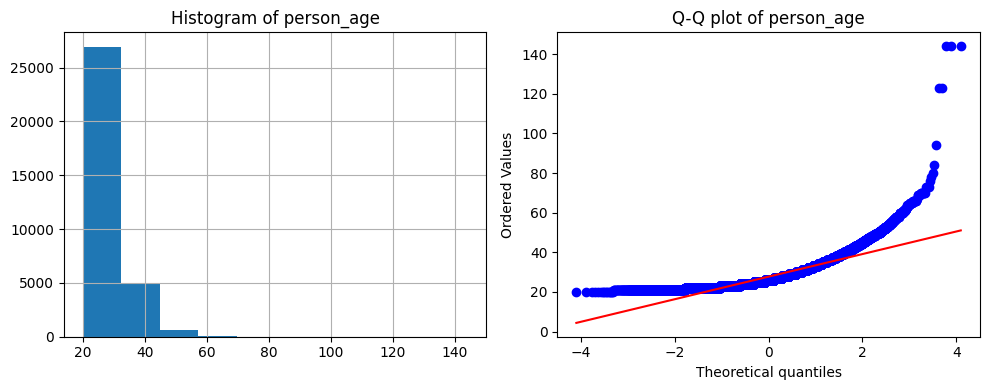

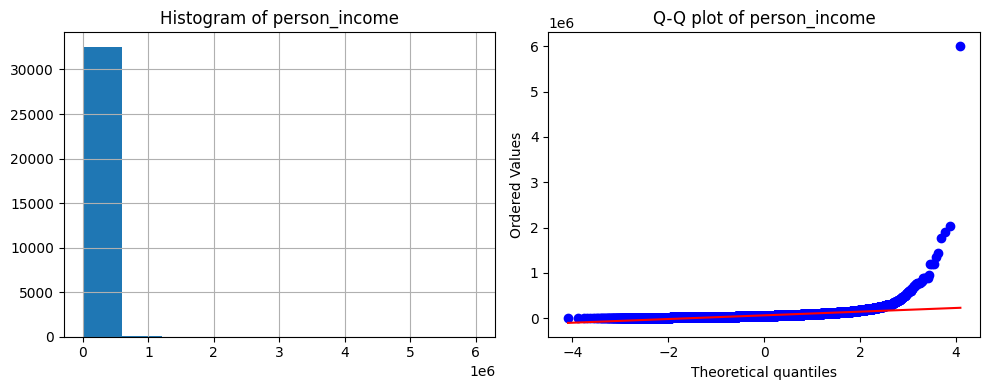

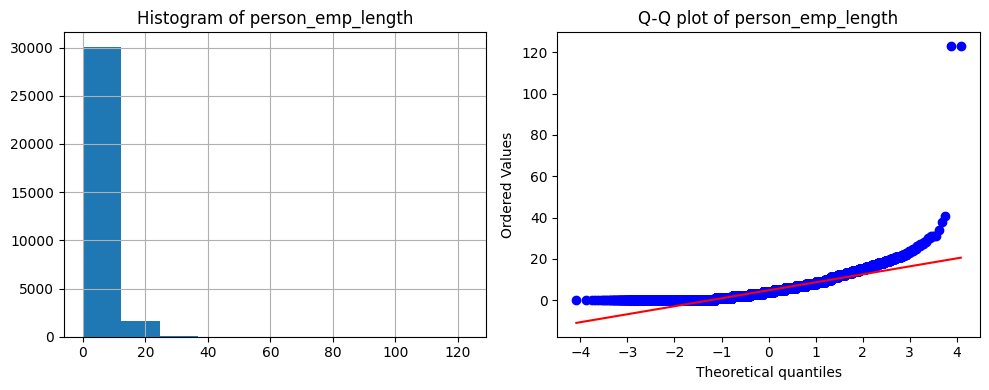

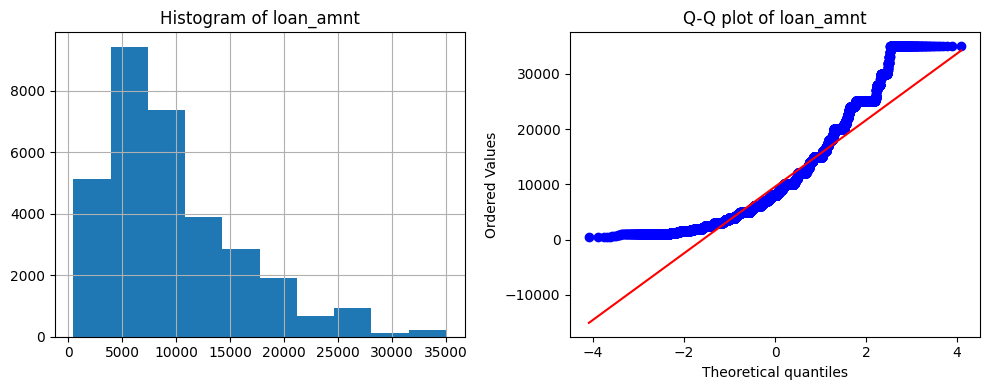

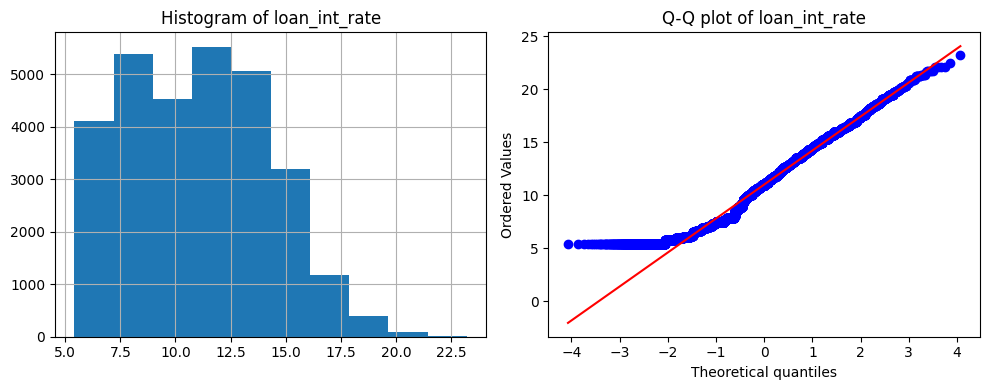

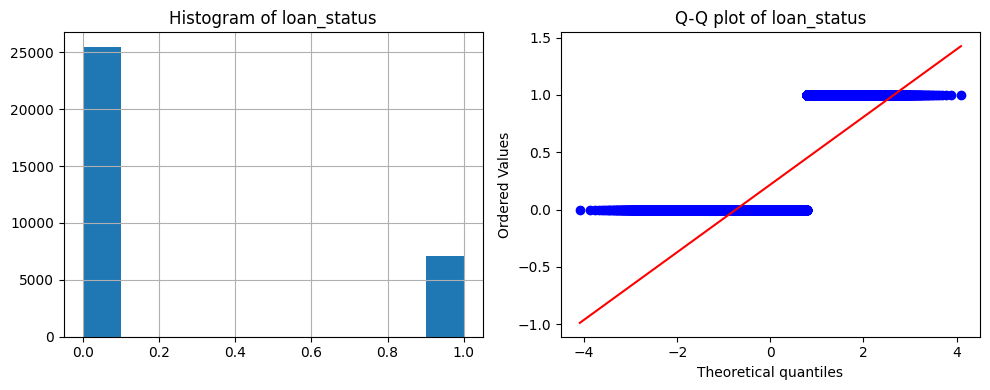

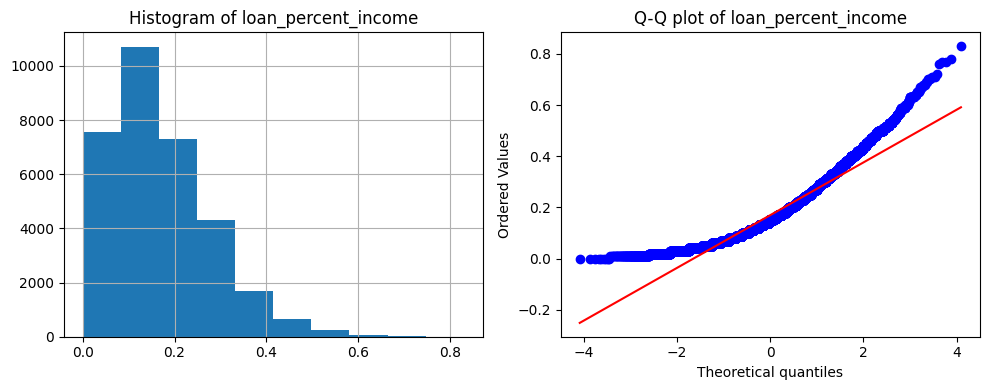

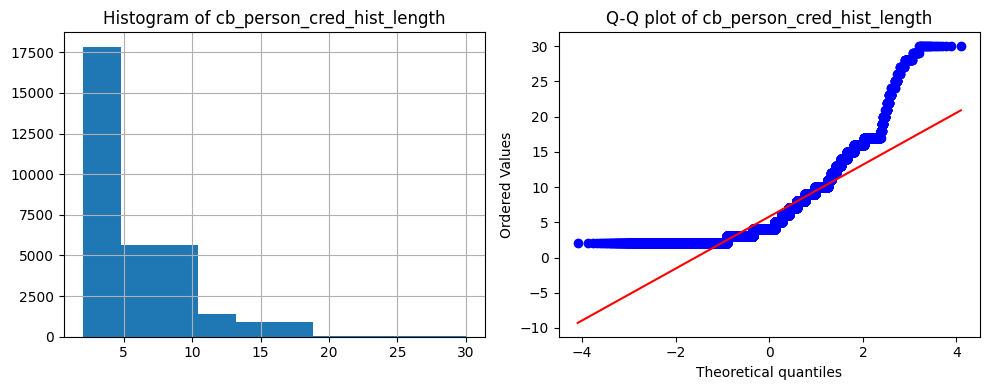


5. Correlation Analysis


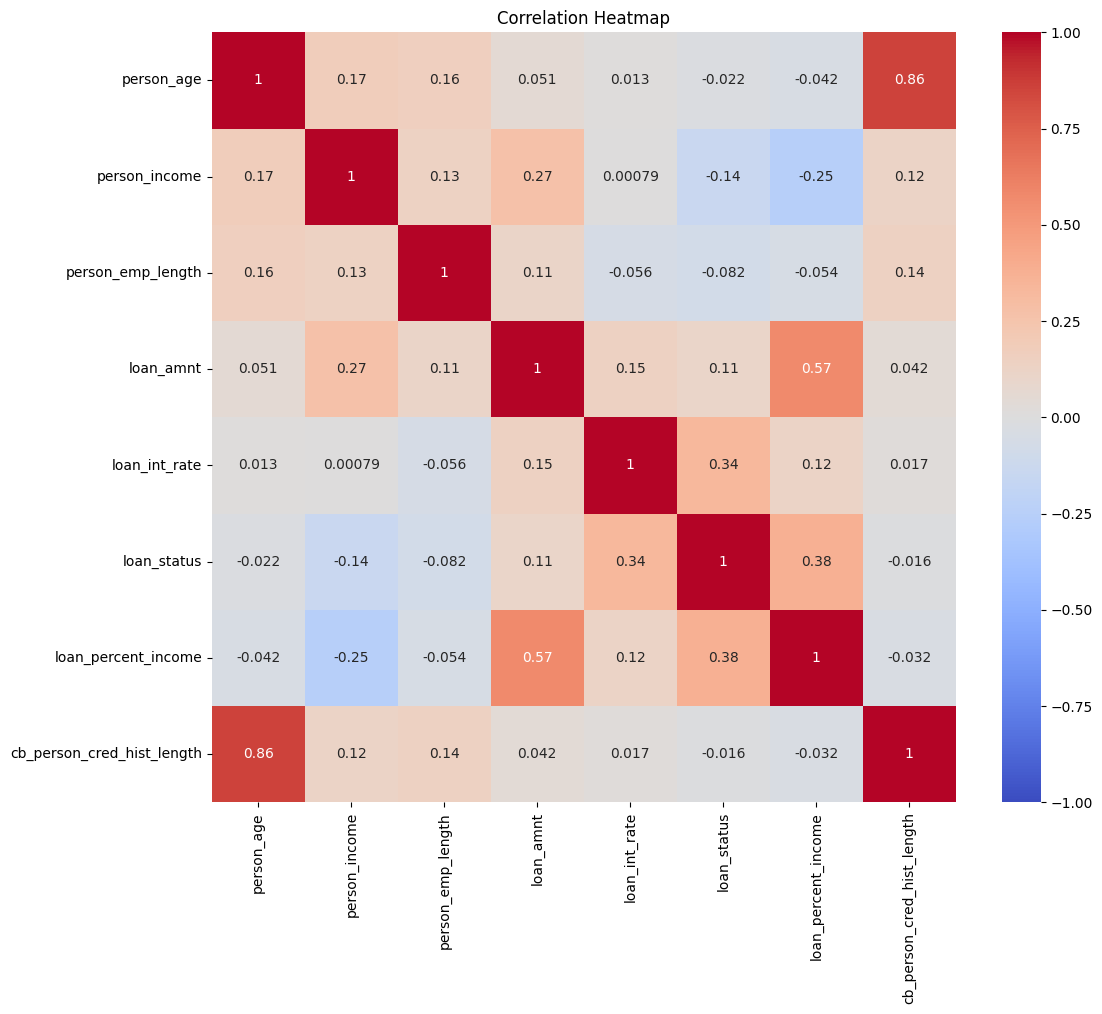


6. Categorical Variables Analysis

Distribution of person_home_ownership:
person_home_ownership
RENT        0.504773
MORTGAGE    0.412633
OWN         0.079310
OTHER       0.003284
Name: proportion, dtype: float64


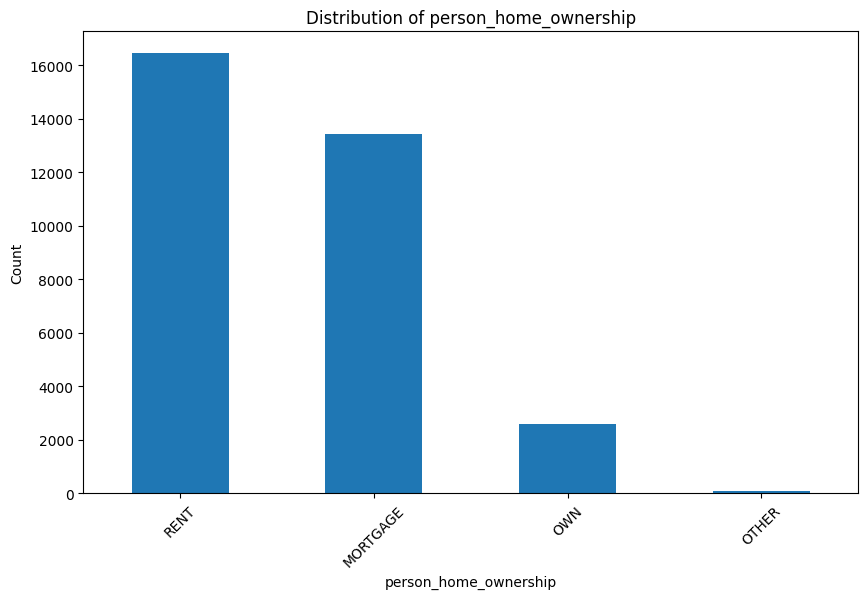


Distribution of loan_intent:
loan_intent
EDUCATION            0.198060
MEDICAL              0.186336
VENTURE              0.175532
PERSONAL             0.169455
DEBTCONSOLIDATION    0.159971
HOMEIMPROVEMENT      0.110647
Name: proportion, dtype: float64


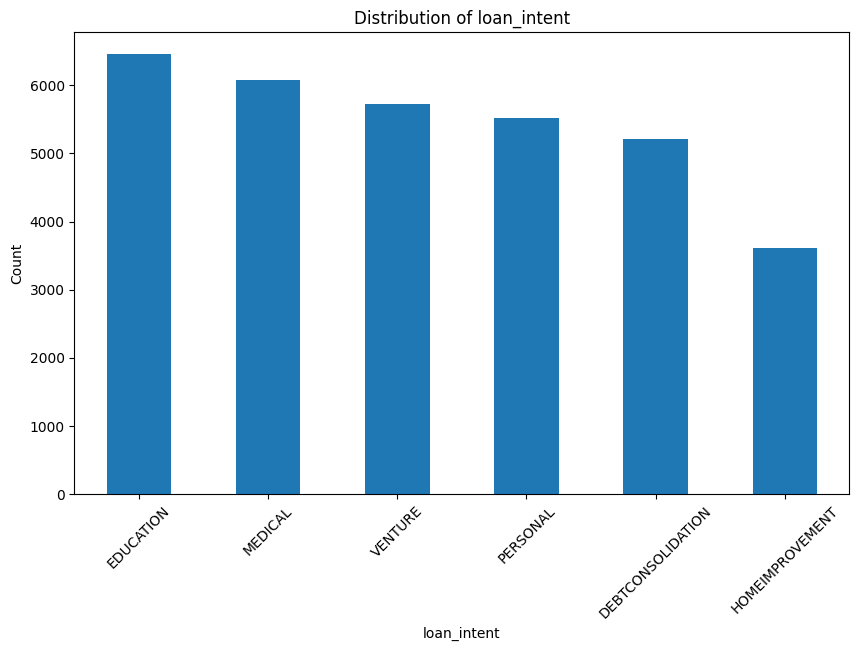


Distribution of loan_grade:
loan_grade
A    0.330776
B    0.320770
C    0.198214
D    0.111292
E    0.029588
F    0.007397
G    0.001964
Name: proportion, dtype: float64


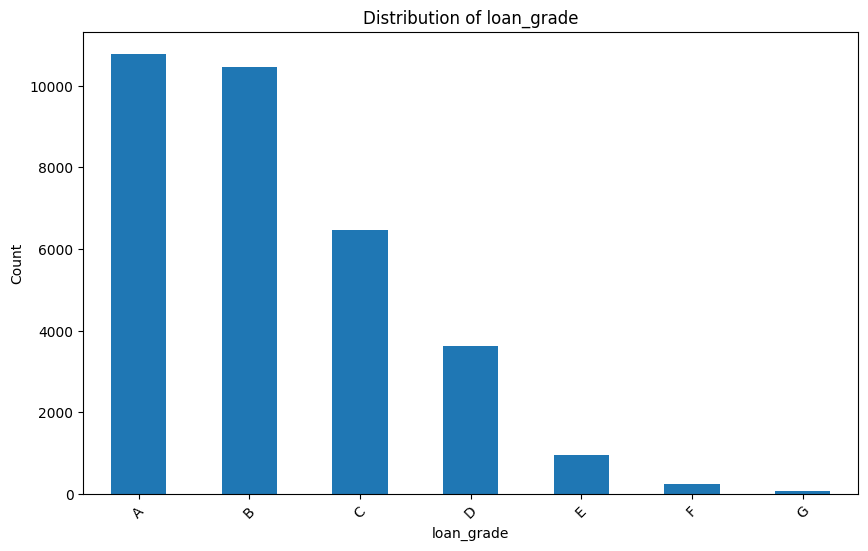


Distribution of cb_person_default_on_file:
cb_person_default_on_file
N    0.82367
Y    0.17633
Name: proportion, dtype: float64


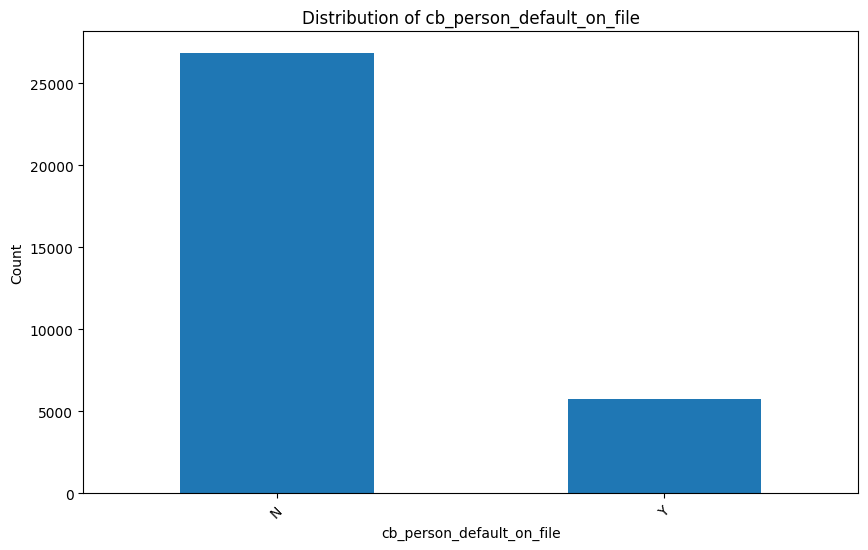


7. Target Variable Analysis (loan_status)
loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64


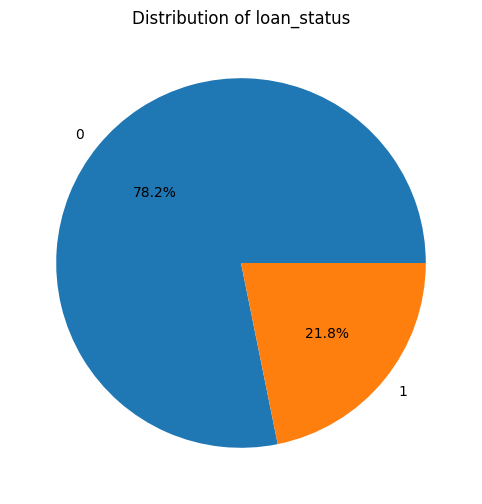


8. Relationship between numeric variables and target


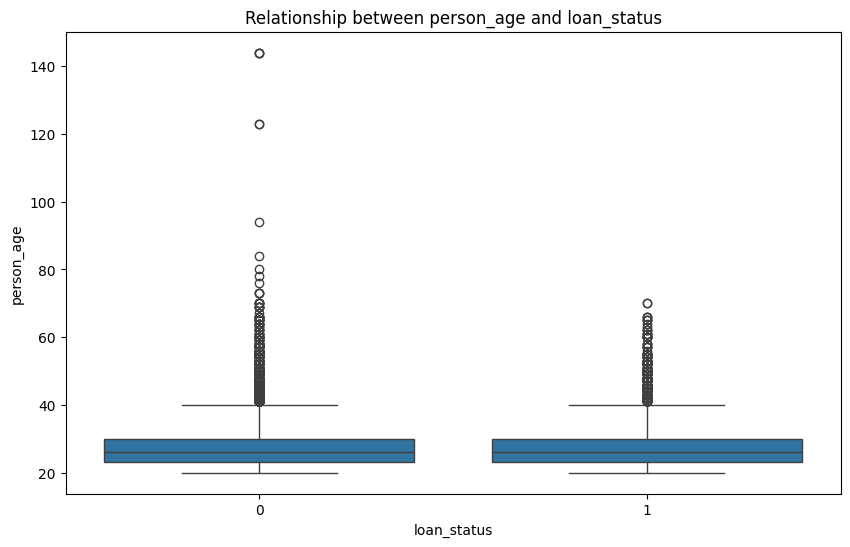

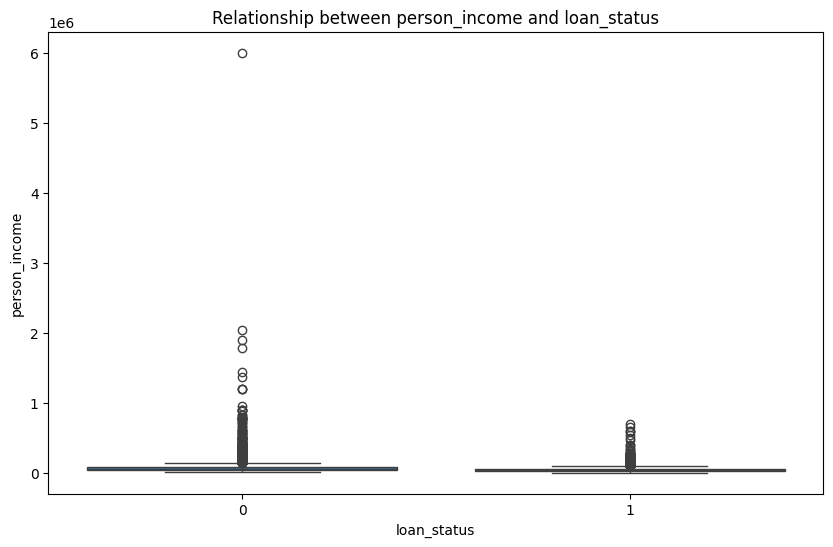

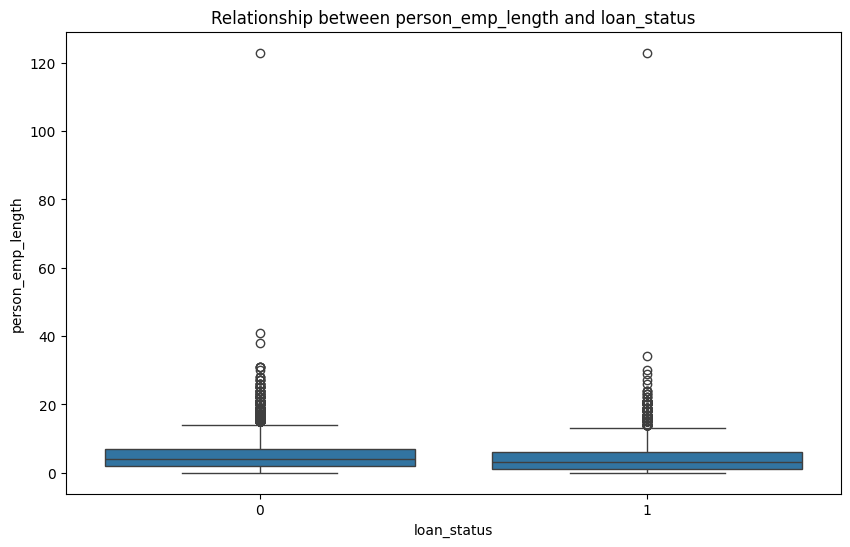

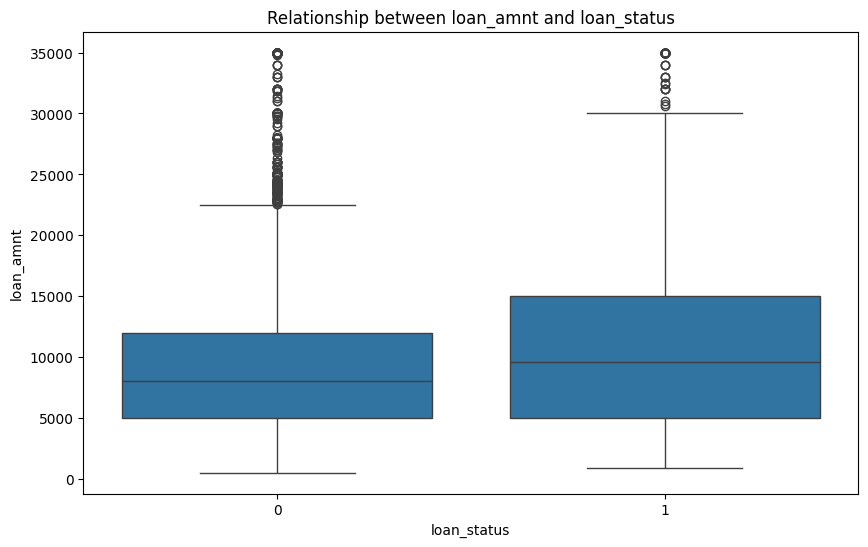

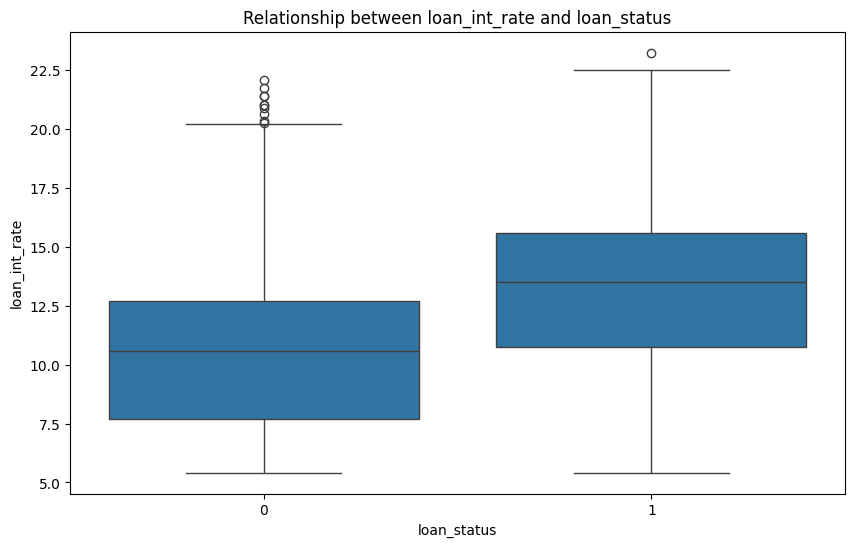

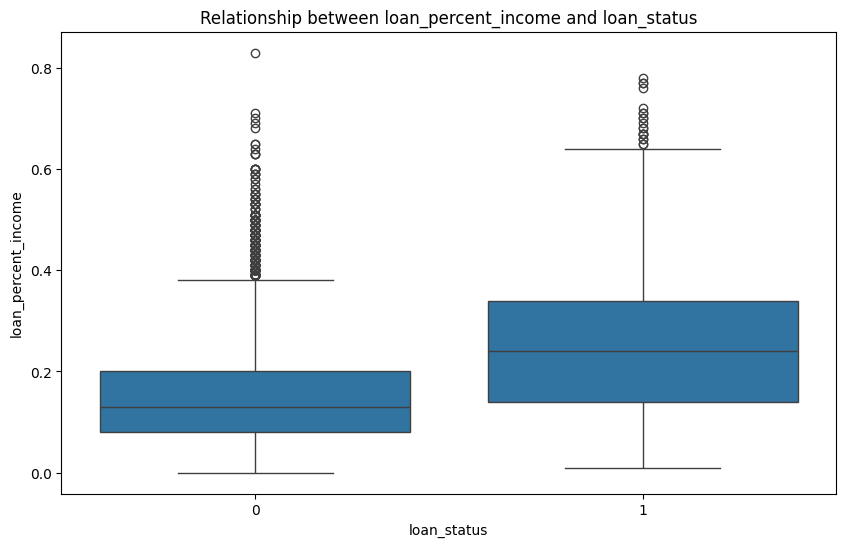

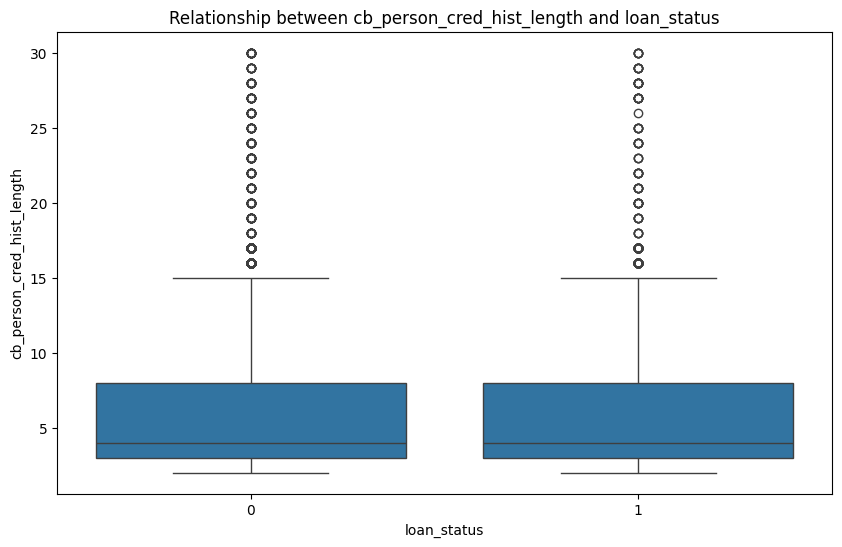


9. Outlier Detection
Outliers in person_age: 1494 (4.59%)
Outliers in person_income: 1484 (4.55%)
Outliers in person_emp_length: 853 (2.62%)
Outliers in loan_amnt: 1689 (5.18%)
Outliers in loan_int_rate: 6 (0.02%)
Outliers in loan_status: 7108 (21.82%)
Outliers in loan_percent_income: 651 (2.00%)
Outliers in cb_person_cred_hist_length: 1142 (3.51%)

10. Feature Engineering Suggestions
- Create age groups (e.g., 20-30, 31-40, etc.)
- Bin income levels
- Calculate debt-to-income ratio using loan_amnt and person_income
- Create a binary feature for employment (employed/unemployed) based on person_emp_length
- Encode categorical variables (one-hot encoding or label encoding)


In [8]:
def comprehensive_eda(df):
    print("1. Data Overview")
    print(df.info())
    print("\n2. Descriptive Statistics")
    print(df.describe())

    print("\n3. Missing Values Analysis")
    missing_values = df.isnull().sum()
    missing_percentages = 100 * missing_values / len(df)
    missing_table = pd.concat([missing_values, missing_percentages], axis=1, keys=['Missing Values', 'Percentage'])
    print(missing_table)

    print("\n4. Distribution Analysis")
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        plt.figure(figsize=(10, 4))
        plt.subplot(121)
        df[col].hist()
        plt.title(f'Histogram of {col}')
        plt.subplot(122)
        stats.probplot(df[col].dropna(), dist="norm", plot=plt)
        plt.title(f'Q-Q plot of {col}')
        plt.tight_layout()
        plt.show()

    print("\n5. Correlation Analysis")
    correlation_matrix = df[numeric_columns].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Heatmap')
    plt.show()

    print("\n6. Categorical Variables Analysis")
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        print(f"\nDistribution of {col}:")
        print(df[col].value_counts(normalize=True))
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

    print("\n7. Target Variable Analysis (loan_status)")
    print(df['loan_status'].value_counts(normalize=True))
    plt.figure(figsize=(8, 6))
    df['loan_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Distribution of loan_status')
    plt.ylabel('')
    plt.show()

    print("\n8. Relationship between numeric variables and target")
    for col in numeric_columns:
        if col != 'loan_status':
            plt.figure(figsize=(10, 6))
            sns.boxplot(x='loan_status', y=col, data=df)
            plt.title(f'Relationship between {col} and loan_status')
            plt.show()

    print("\n9. Outlier Detection")
    for col in numeric_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"Outliers in {col}: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

    print("\n10. Feature Engineering Suggestions")
    print("- Create age groups (e.g., 20-30, 31-40, etc.)")
    print("- Bin income levels")
    print("- Calculate debt-to-income ratio using loan_amnt and person_income")
    print("- Create a binary feature for employment (employed/unemployed) based on person_emp_length")
    print("- Encode categorical variables (one-hot encoding or label encoding)")

# Run the comprehensive EDA
comprehensive_eda(df)

## Deal with outliers

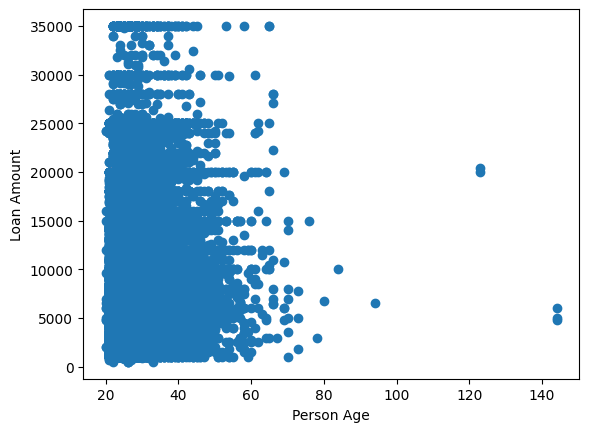

In [9]:
# scatter plot on person_age
plt.scatter(df['person_age'], df['loan_amnt'])
plt.xlabel('Person Age')
plt.ylabel('Loan Amount')
plt.show()

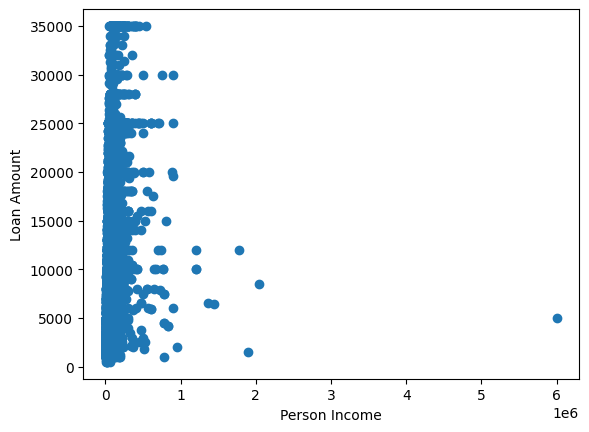

In [10]:
# scatter plot of person_income
plt.scatter(df['person_income'], df['loan_amnt'])
plt.xlabel('Person Income')
plt.ylabel('Loan Amount')
plt.show()

In [11]:
df['person_income'].max()

6000000

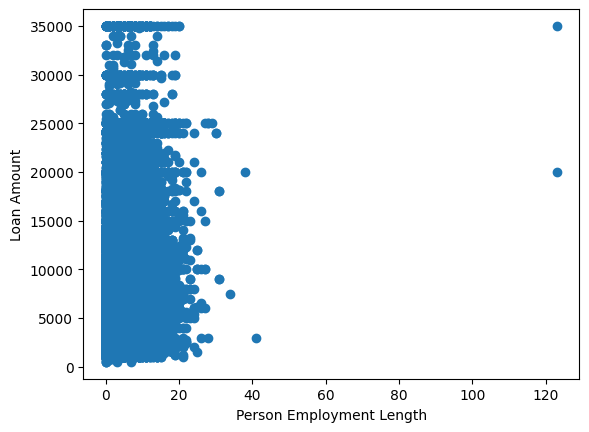

In [12]:
# scatter plot for person_emp_length
plt.scatter(df['person_emp_length'], df['loan_amnt'])
plt.xlabel('Person Employment Length')
plt.ylabel('Loan Amount')
plt.show()

In [13]:
df[df['person_emp_length']>60]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [14]:
def remove_outliers(df):
    """
    Remove outliers from the DataFrame based on specific criteria.

    Parameters:
    df (pandas.DataFrame): The input DataFrame

    Returns:
    pandas.DataFrame: The DataFrame with outliers removed
    """
    # Make a copy of the DataFrame to avoid modifying the original
    df_clean = df.copy()

    # Remove rows where person_age > 80
    df_clean = df_clean[df_clean['person_age'] <= 80]

    # Remove rows with the maximum person_income: 6000000
    df_clean = df_clean[df_clean['person_income'] < 6000000]

    # Remove rows where person_emp_length > 60, keeping NaN values
    df_clean = df_clean[(df_clean['person_emp_length'] <= 60) | (df_clean['person_emp_length'].isnull())]

    # Reset the index of the DataFrame
    df_clean = df_clean.reset_index(drop=True)

    # Print the number of rows removed
    rows_removed = len(df) - len(df_clean)
    print(f"Removed {rows_removed} rows ({rows_removed/len(df)*100:.2f}% of the data)")

    return df_clean

# Usage example:
data = remove_outliers(df)

Removed 9 rows (0.03% of the data)


## Analyse missing value

1. Visualizing missing value patterns


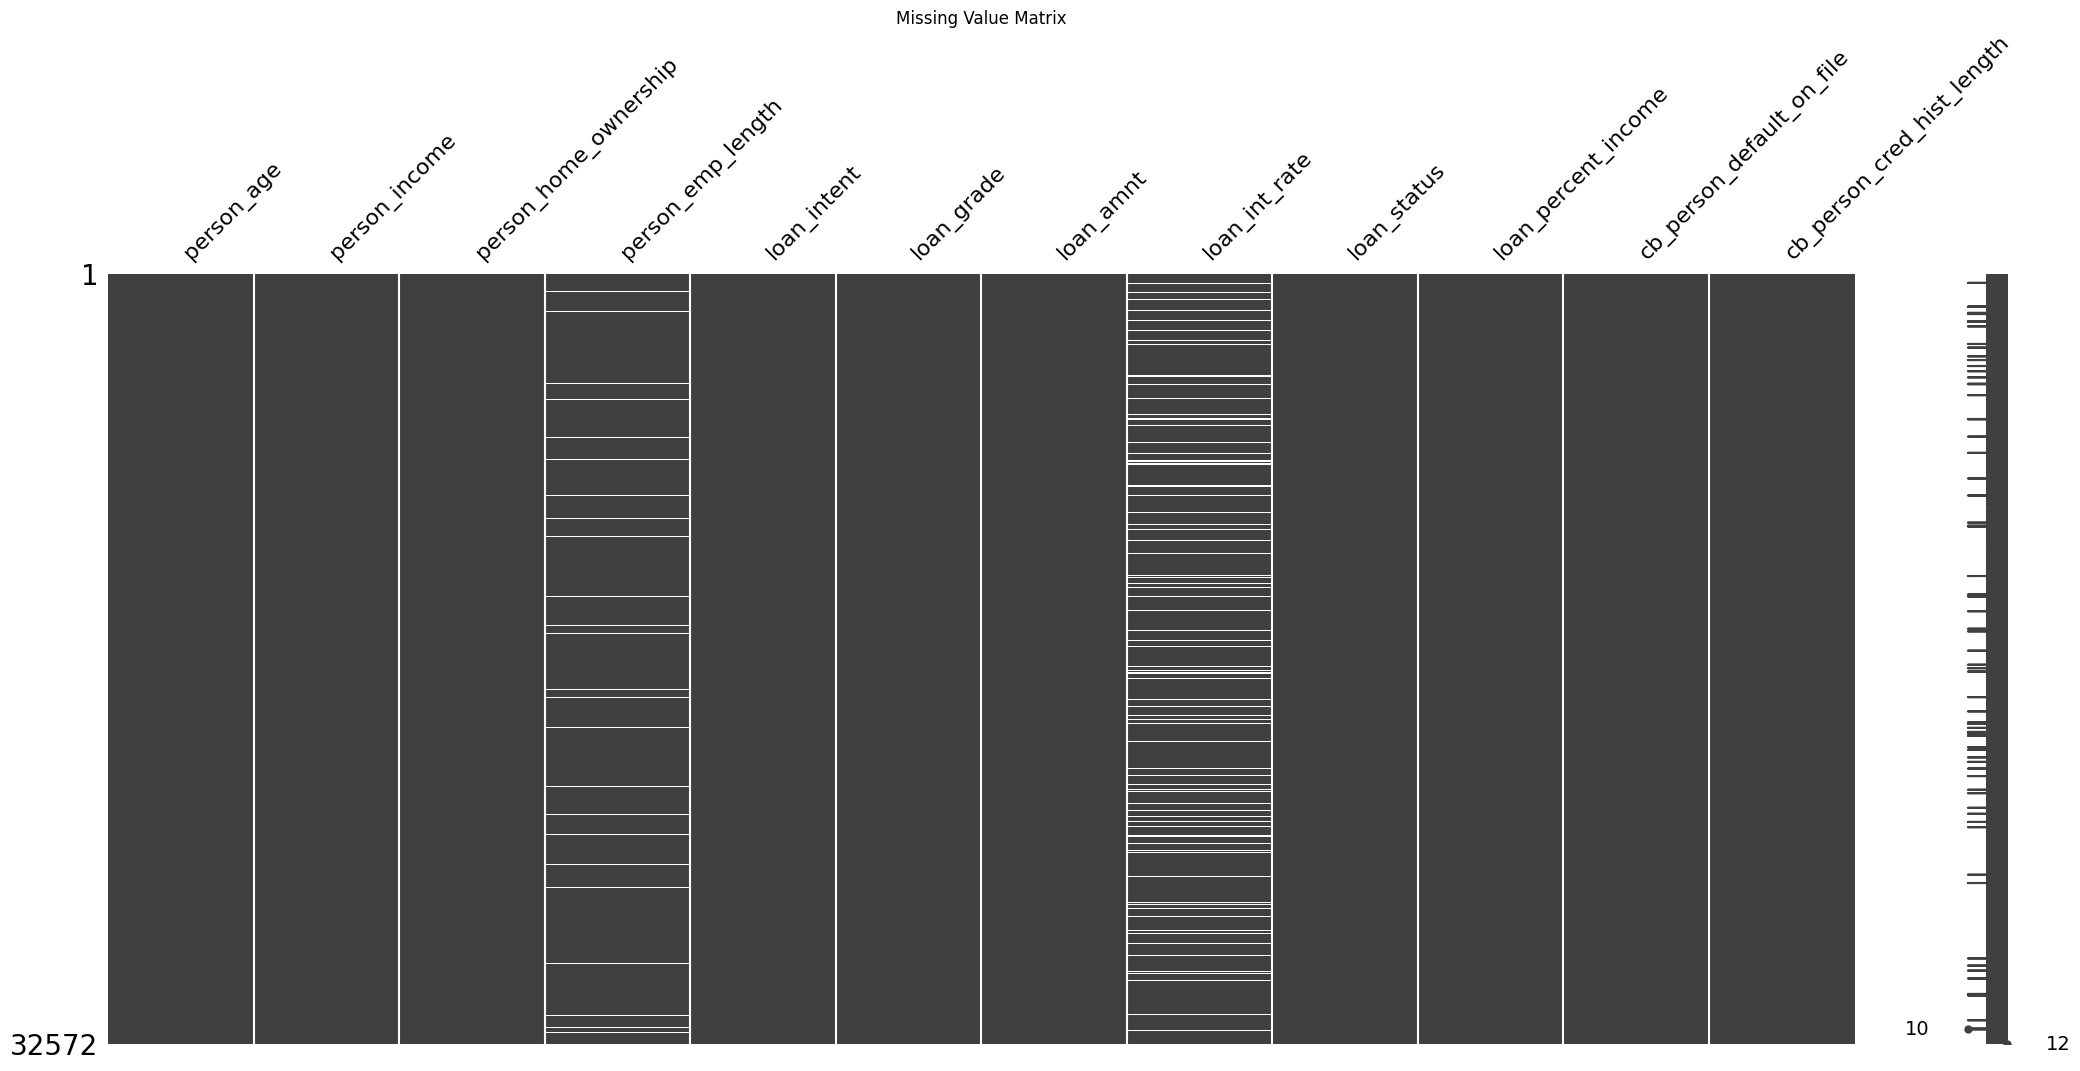

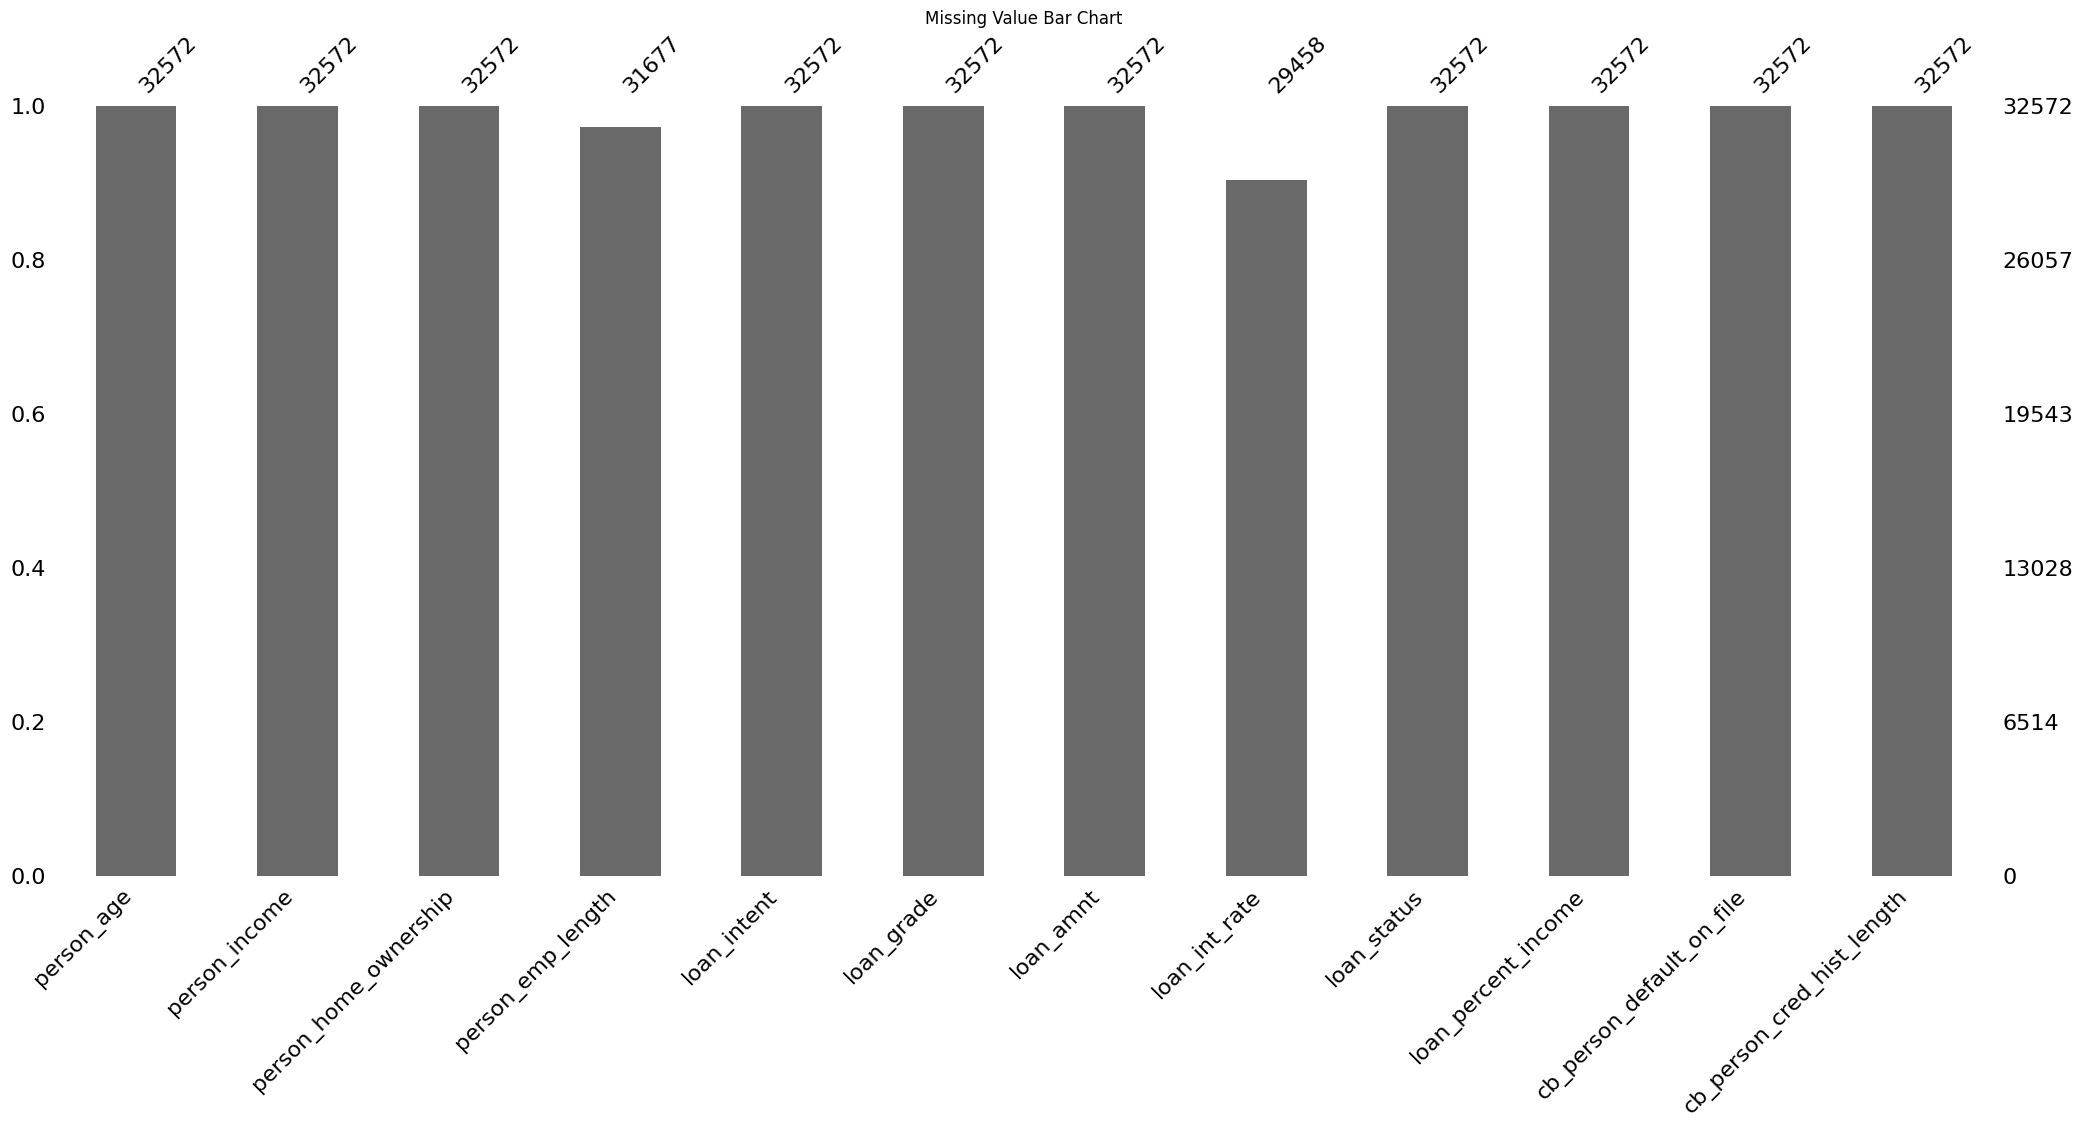

<Figure size 1200x1000 with 0 Axes>

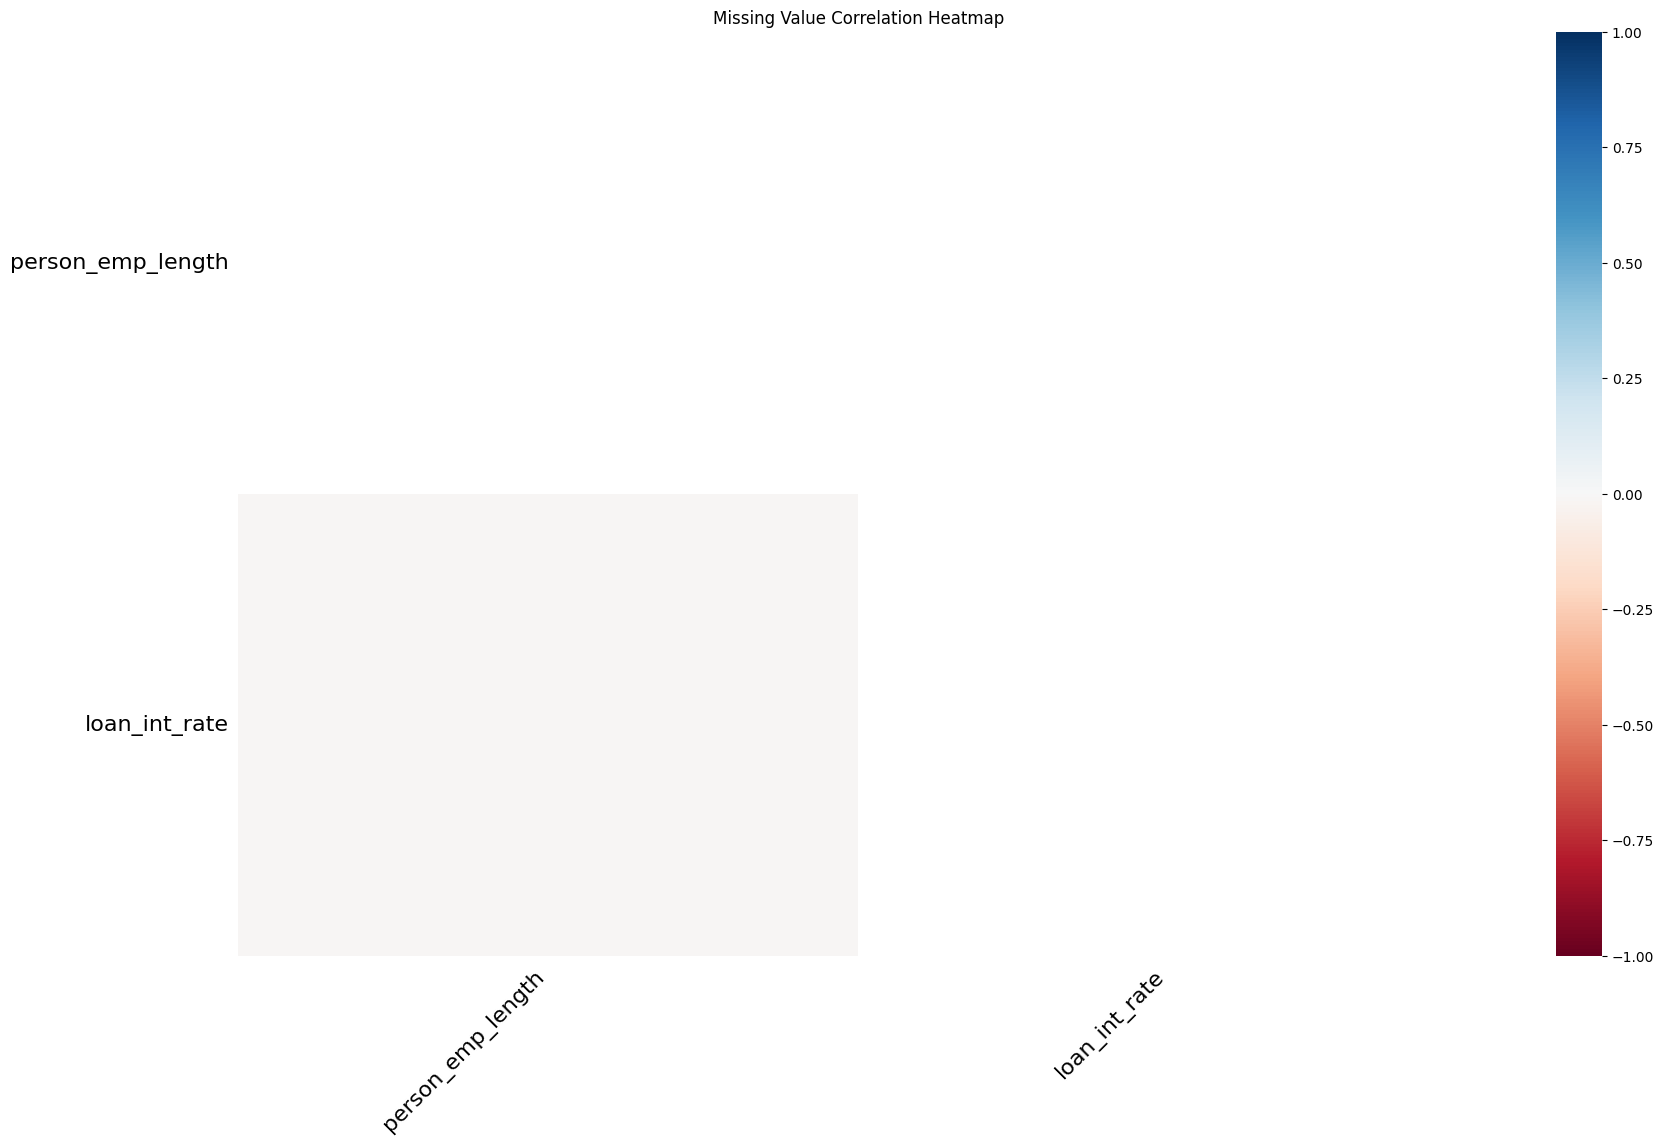


2. Analyzing relationships between missing values and other variables


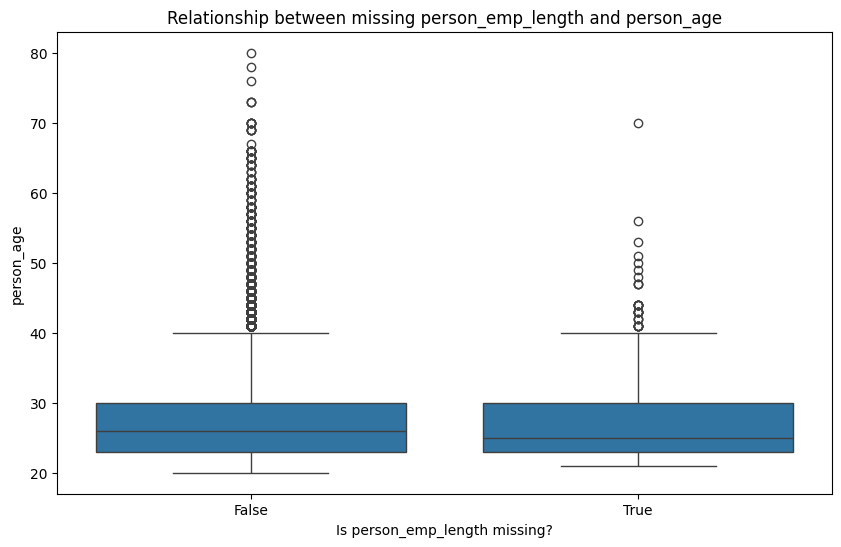

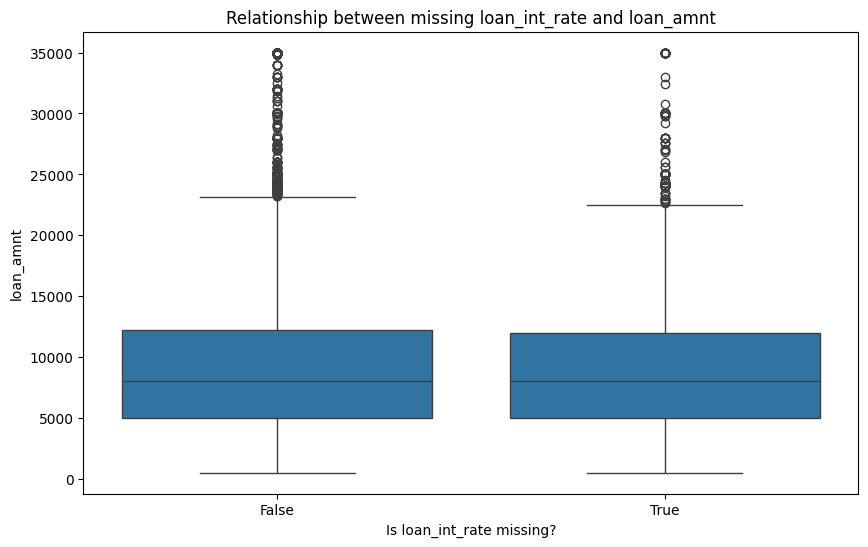


3. Missing value statistics:
                   Missing Count  Missing Percent
loan_int_rate               3114         9.560359
person_emp_length            895         2.747759


In [15]:
import missingno as msno
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

def analyze_missing_values(df):
    print("1. Visualizing missing value patterns")

    # Missing Value Matrix
    msno.matrix(df)
    plt.title("Missing Value Matrix")
    plt.show()

    # Missing Value Bar Chart
    msno.bar(df)
    plt.title("Missing Value Bar Chart")
    plt.show()

    # Missing Value Correlation Heatmap with Legend
    plt.figure(figsize=(12, 10))
    msno.heatmap(df)
    plt.title("Missing Value Correlation Heatmap")
    plt.show()

    print("\n2. Analyzing relationships between missing values and other variables")

    # For person_emp_length
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['person_emp_length'].isnull(), y=df['person_age'])
    plt.title("Relationship between missing person_emp_length and person_age")
    plt.xlabel("Is person_emp_length missing?")
    plt.show()

    # For loan_int_rate
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['loan_int_rate'].isnull(), y=df['loan_amnt'])
    plt.title("Relationship between missing loan_int_rate and loan_amnt")
    plt.xlabel("Is loan_int_rate missing?")
    plt.show()

    # Missing value statistics
    print("\n3. Missing value statistics:")
    missing_stats = df.isnull().sum().sort_values(ascending=False)
    missing_percent = 100 * df.isnull().sum() / len(df)
    missing_table = pd.concat([missing_stats, missing_percent], axis=1, keys=['Missing Count', 'Missing Percent'])
    print(missing_table[missing_table['Missing Count'] > 0])

# Usage
analyze_missing_values(data)

In [16]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3114
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

## Deal with missing data & Split the data for model training

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder

def preprocess_data(df, target_column='loan_status', test_size=0.2, random_state=42):
    # Separate features and target
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Identify numeric and categorical columns
    numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
                        'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
    categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

    # Handle missing values for 'person_emp_length'
    emp_length_imputer = KNNImputer(n_neighbors=5)
    X_train['person_emp_length'] = emp_length_imputer.fit_transform(X_train[['person_emp_length', 'person_age', 'person_income']])[:, 0]
    X_test['person_emp_length'] = emp_length_imputer.transform(X_test[['person_emp_length', 'person_age', 'person_income']])[:, 0]

    # Handle missing values for 'loan_int_rate'
    int_rate_imputer = KNNImputer(n_neighbors=5)
    X_train['loan_int_rate'] = int_rate_imputer.fit_transform(X_train[['loan_int_rate', 'loan_amnt', 'loan_percent_income']])[:, 0]
    X_test['loan_int_rate'] = int_rate_imputer.transform(X_test[['loan_int_rate', 'loan_amnt', 'loan_percent_income']])[:, 0]

    # Perform one-hot encoding
    onehot = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
    cat_encoded_train = onehot.fit_transform(X_train[categorical_features])
    cat_encoded_test = onehot.transform(X_test[categorical_features])

    # Get feature names for encoded categorical variables
    cat_feature_names = onehot.get_feature_names_out(categorical_features)

    # Combine numeric and encoded categorical data
    X_train_processed = pd.concat([
        X_train[numeric_features].reset_index(drop=True),
        pd.DataFrame(cat_encoded_train, columns=cat_feature_names)
    ], axis=1)

    X_test_processed = pd.concat([
        X_test[numeric_features].reset_index(drop=True),
        pd.DataFrame(cat_encoded_test, columns=cat_feature_names)
    ], axis=1)

    print("Data preprocessing complete.")
    return X_train_processed, X_test_processed, y_train, y_test

# Usage
X_train, X_test, y_train, y_test = preprocess_data(data)

Data preprocessing complete.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Check data readiness

In [18]:
def check_data_readiness(X_train, X_test, y_train, y_test):
    print("Checking data readiness for machine learning...")

    # Check shapes
    print("\n1. Shape of datasets:")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")

    # Check data types
    print("\n2. Data types in X_train:")
    print(X_train.dtypes)

    # Check for missing values
    print("\n3. Missing values:")
    print("X_train missing values:")
    print(X_train.isnull().sum())
    print("\nX_test missing values:")
    print(X_test.isnull().sum())

    # Check unique values in target variable
    print("\n4. Unique values in target variable:")
    print("y_train unique values:", np.unique(y_train))
    print("y_test unique values:", np.unique(y_test))


    # Check feature names consistency
    print("\n5. Feature names consistency:")
    print("Features are consistent:", set(X_train.columns) == set(X_test.columns))

    print("\nData readiness check complete.")

# Usage
check_data_readiness(X_train, X_test, y_train, y_test)

Checking data readiness for machine learning...

1. Shape of datasets:
X_train shape: (26057, 22)
X_test shape: (6515, 22)
y_train shape: (26057,)
y_test shape: (6515,)

2. Data types in X_train:
person_age                       int64
person_income                    int64
person_emp_length              float64
loan_amnt                        int64
loan_int_rate                  float64
loan_percent_income            float64
cb_person_cred_hist_length       int64
person_home_ownership_OTHER    float64
person_home_ownership_OWN      float64
person_home_ownership_RENT     float64
loan_intent_EDUCATION          float64
loan_intent_HOMEIMPROVEMENT    float64
loan_intent_MEDICAL            float64
loan_intent_PERSONAL           float64
loan_intent_VENTURE            float64
loan_grade_B                   float64
loan_grade_C                   float64
loan_grade_D                   float64
loan_grade_E                   float64
loan_grade_F                   float64
loan_grade_G            

# Feature Engineering

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def comprehensive_feature_engineering(X_train, X_test, y_train):
    def engineer_features(X):
        X_eng = X.copy()

        # Ratio Features
        X_eng['loan_to_income'] = X_eng['loan_amnt'] / X_eng['person_income']
        X_eng['interest_to_loan'] = X_eng['loan_int_rate'] / X_eng['loan_amnt']
        X_eng['income_per_year_employed'] = X_eng['person_income'] / (X_eng['person_emp_length'] + 1)
        X_eng['loan_to_credit_history'] = X_eng['loan_amnt'] / (X_eng['cb_person_cred_hist_length'] + 1)

        # Interaction Features
        X_eng['income_emp_length'] = X_eng['person_income'] * X_eng['person_emp_length']
        X_eng['loan_grade_emp_length'] = X_eng['person_emp_length'] * (
            X_eng['loan_grade_B'] + 2*X_eng['loan_grade_C'] + 3*X_eng['loan_grade_D'] +
            4*X_eng['loan_grade_E'] + 5*X_eng['loan_grade_F'] + 6*X_eng['loan_grade_G']
        )

        # Group Features
        X_eng['age_group'] = pd.cut(X_eng['person_age'], bins=[0, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '55+'])
        X_eng['income_group'] = pd.qcut(X_eng['person_income'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
        X_eng['credit_history_group'] = pd.cut(X_eng['cb_person_cred_hist_length'], bins=[0, 2, 5, 10, 20, 100], labels=['New', 'Short', 'Medium', 'Long', 'Very Long'])

        # Domain-specific Features
        X_eng['is_high_risk_loan'] = ((X_eng['loan_int_rate'] > X_eng['loan_int_rate'].median()) &
                                      (X_eng['loan_percent_income'] > X_eng['loan_percent_income'].median())).astype(int)
        X_eng['is_high_income_short_emp'] = ((X_eng['person_income'] > X_eng['person_income'].median()) &
                                             (X_eng['person_emp_length'] < X_eng['person_emp_length'].median())).astype(int)

        # Log Transformation
        X_eng['person_income_log'] = np.log1p(X_eng['person_income'])
        X_eng['loan_amnt_log'] = np.log1p(X_eng['loan_amnt'])

        return X_eng

    # Apply initial feature engineering
    X_train_eng = engineer_features(X_train)
    X_test_eng = engineer_features(X_test)

    # Define feature types
    numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
                        'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
                        'loan_to_income', 'interest_to_loan', 'income_per_year_employed',
                        'loan_to_credit_history', 'income_emp_length', 'loan_grade_emp_length',
                        'is_high_risk_loan', 'is_high_income_short_emp',
                        'person_income_log', 'loan_amnt_log']
    categorical_features = ['age_group', 'income_group', 'credit_history_group']
    polynomial_features = ['person_age', 'person_income', 'loan_amnt']

    # Create preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numeric_features),
            ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features),
            ('poly', PolynomialFeatures(degree=2, include_bias=False), polynomial_features)
        ])

    # Fit on training data and transform both training and test data
    X_train_processed = preprocessor.fit_transform(X_train_eng)
    X_test_processed = preprocessor.transform(X_test_eng)

    # Get feature names
    num_names = numeric_features
    cat_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    poly_names = [f'poly_{i}' for i in range(X_train_processed.shape[1] - len(num_names) - len(cat_names))]
    feature_names = list(num_names) + list(cat_names) + list(poly_names)

    # Convert to DataFrames
    X_train_final = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
    X_test_final = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

    # Feature Selection
    mi_scores = mutual_info_regression(X_train_final, y_train)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=feature_names).sort_values(ascending=False)
    top_features = mi_scores.nlargest(30).index.tolist()

    X_train_final = X_train_final[top_features]
    X_test_final = X_test_final[top_features]

    print("Feature engineering complete.")
    print(f"Shape of engineered datasets: train {X_train_final.shape}, test {X_test_final.shape}")
    print("\nTop 10 features by mutual information score:")
    print(mi_scores.nlargest(10))

    return X_train_final, X_test_final, mi_scores

# Usage
X_train_eng, X_test_eng, feature_importance = comprehensive_feature_engineering(X_train, X_test, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Feature engineering complete.
Shape of engineered datasets: train (26057, 30), test (6515, 30)

Top 10 features by mutual information score:
poly_1                      0.110812
person_income_log           0.110551
loan_to_income              0.110227
person_income               0.105454
poly_6                      0.100848
loan_percent_income         0.086614
poly_4                      0.075585
loan_int_rate               0.073605
income_per_year_employed    0.054962
interest_to_loan            0.054604
Name: MI Scores, dtype: float64


In [20]:
X_train_eng.columns

Index(['poly_1', 'person_income_log', 'loan_to_income', 'person_income',
       'poly_6', 'loan_percent_income', 'poly_4', 'loan_int_rate',
       'income_per_year_employed', 'interest_to_loan', 'income_emp_length',
       'poly_7', 'income_group_Very Low', 'is_high_risk_loan',
       'loan_grade_emp_length', 'poly_2', 'loan_amnt_log', 'poly_5',
       'income_group_Very High', 'loan_amnt', 'is_high_income_short_emp',
       'person_emp_length', 'loan_to_credit_history', 'age_group_26-35',
       'poly_8', 'poly_0', 'age_group_46-55', 'cb_person_cred_hist_length',
       'credit_history_group_Short', 'credit_history_group_Very Long'],
      dtype='object')

In [21]:
def combine_original_and_engineered_features(X_original, X_engineered):
    """
    Combine original features with engineered features, removing duplicates.

    Parameters:
    X_original (pd.DataFrame): Original feature set
    X_engineered (pd.DataFrame): Engineered feature set

    Returns:
    pd.DataFrame: Combined feature set without duplicates
    """
    # Combine the DataFrames
    X_combined = pd.concat([X_original, X_engineered], axis=1)

    # Get list of duplicate columns
    duplicates = X_combined.columns.duplicated()

    # Keep only the first occurrence of each column
    X_combined = X_combined.loc[:, ~duplicates]

    return X_combined

# Usage
X_train_whole = combine_original_and_engineered_features(X_train, X_train_eng)
X_test_whole = combine_original_and_engineered_features(X_test, X_test_eng)

print("Shape of X_train_whole:", X_train_whole.shape)
print("Shape of X_test_whole:", X_test_whole.shape)
print("\nColumns in X_train_whole:")
print(X_train_whole.columns.tolist())

Shape of X_train_whole: (26057, 46)
Shape of X_test_whole: (6515, 46)

Columns in X_train_whole:
['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y', 'poly_1', 'person_income_log', 'loan_to_income', 'poly_6', 'poly_4', 'income_per_year_employed', 'interest_to_loan', 'income_emp_length', 'poly_7', 'income_group_Very Low', 'is_high_risk_loan', 'loan_grade_emp_length', 'poly_2', 'loan_amnt_log', 'poly_5', 'income_group_Very High', 'is_high_income_short_emp', 'loan_to_credit_history', 'age_group_26-35', 'poly_8', 'poly_0', 'age_group_46-55', 'credit_history_group_Short', 

## Feature selection:
- A set based purely on Mutual Information
- A set of uncorrelated features
- A set of PCA components
- A combined set of uncorrelated features and top PCA components

In [22]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def comprehensive_feature_selection(X_train, X_test, y_train, n_top_features=30, correlation_threshold=0.8, pca_variance=0.95):
    """
    Perform comprehensive feature selection using Mutual Information,
    correlation analysis, and PCA.

    Parameters:
    X_train (pd.DataFrame): Training feature set
    X_test (pd.DataFrame): Test feature set
    y_train (pd.Series): Training target variable
    n_top_features (int): Number of top features to select based on MI scores
    correlation_threshold (float): Threshold for identifying highly correlated features
    pca_variance (float): Desired explained variance ratio for PCA

    Returns:
    dict: Various feature sets and PCA object
    """
    # Step 1: Mutual Information Scoring
    mi_scores = mutual_info_regression(X_train, y_train)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    # Select top N features based on MI scores
    top_features = mi_scores.nlargest(n_top_features).index.tolist()

    # Step 2: Check for multicollinearity
    correlation_matrix = X_train[top_features].corr().abs()
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > correlation_threshold)]

    # Remove highly correlated features
    uncorrelated_features = [feat for feat in top_features if feat not in to_drop]

    # Step 3: Apply PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[uncorrelated_features])
    X_test_scaled = scaler.transform(X_test[uncorrelated_features])

    pca = PCA(n_components=pca_variance, svd_solver='full')
    pca.fit(X_train_scaled)

    # Transform the data
    X_train_pca = pca.transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Step 4: Create multiple feature sets
    feature_sets = {
        'mi_top_features': top_features,
        'uncorrelated_features': uncorrelated_features,
        'pca_components': [f'PC_{i+1}' for i in range(pca.n_components_)],
        'combined_features': uncorrelated_features + [f'PC_{i+1}' for i in range(min(5, pca.n_components_))]
    }

    # Prepare the final datasets
    X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC_{i+1}' for i in range(pca.n_components_)], index=X_train.index)
    X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC_{i+1}' for i in range(pca.n_components_)], index=X_test.index)

    X_train_combined = pd.concat([X_train[uncorrelated_features], X_train_pca_df.iloc[:, :5]], axis=1)
    X_test_combined = pd.concat([X_test[uncorrelated_features], X_test_pca_df.iloc[:, :5]], axis=1)

    final_datasets = {
        'mi_top': (X_train[top_features], X_test[top_features]),
        'uncorrelated': (X_train[uncorrelated_features], X_test[uncorrelated_features]),
        'pca': (X_train_pca_df, X_test_pca_df),
        'combined': (X_train_combined, X_test_combined)
    }

    return {
        'feature_sets': feature_sets,
        'final_datasets': final_datasets,
        'mi_scores': mi_scores,
        'pca': pca
    }

# Usage
results = comprehensive_feature_selection(X_train_whole, X_test_whole, y_train)

# Print results
print("Top 10 features by Mutual Information Score:")
print(results['mi_scores'].nlargest(10))

print("\nNumber of features in each set:")
for name, features in results['feature_sets'].items():
    print(f"{name}: {len(features)}")

print("\nExplained variance ratio of PCA components:")
print(results['pca'].explained_variance_ratio_)

print("\nShapes of final datasets:")
for name, (train, test) in results['final_datasets'].items():
    print(f"{name} - Train: {train.shape}, Test: {test.shape}")

Top 10 features by Mutual Information Score:
poly_1                      0.110885
person_income_log           0.108055
person_income               0.107776
loan_to_income              0.106939
poly_6                      0.106476
loan_percent_income         0.086495
loan_int_rate               0.075735
poly_4                      0.072884
income_per_year_employed    0.056028
income_emp_length           0.050328
Name: MI Scores, dtype: float64

Number of features in each set:
mi_top_features: 30
uncorrelated_features: 22
pca_components: 16
combined_features: 27

Explained variance ratio of PCA components:
[0.1975371  0.14162867 0.11797916 0.10004135 0.05816049 0.05559607
 0.0507006  0.04817267 0.03405577 0.0299807  0.02711952 0.02580783
 0.02211999 0.02199272 0.01801727 0.01272301]

Shapes of final datasets:
mi_top - Train: (26057, 30), Test: (6515, 30)
uncorrelated - Train: (26057, 22), Test: (6515, 22)
pca - Train: (26057, 16), Test: (6515, 16)
combined - Train: (26057, 27), Test: (65

In [23]:
import os
import pandas as pd

def save_datasets_to_csv(results, y_train, y_test, output_dir='datasets'):
    """
    Save the different datasets and target variables to separate CSV files.

    Parameters:
    results (dict): Output from comprehensive_feature_selection function
    y_train (pd.Series): Training target variable
    y_test (pd.Series): Test target variable
    output_dir (str): Directory to save the CSV files
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Save y_train and y_test
    y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=False)
    y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=False)

    # Save each dataset
    for name, (train, test) in results['final_datasets'].items():
        train.to_csv(os.path.join(output_dir, f'X_train_{name}.csv'), index=False)
        test.to_csv(os.path.join(output_dir, f'X_test_{name}.csv'), index=False)

    print(f"All datasets have been saved to the '{output_dir}' directory.")

# Usage
save_datasets_to_csv(results, y_train, y_test)

# Print out the list of saved files
print("\nSaved files:")
for file in os.listdir('datasets'):
    print(file)

All datasets have been saved to the 'datasets' directory.

Saved files:
X_train_mi_top.csv
y_test.csv
X_train_uncorrelated.csv
X_train_combined.csv
X_test_mi_top.csv
X_test_combined.csv
X_train_pca.csv
y_train.csv
X_test_pca.csv
X_test_uncorrelated.csv


In [24]:
def check_saved_datasets_shapes(directory='datasets'):
    """
    Check and display the shapes of all CSV files in the specified directory.

    Parameters:
    directory (str): Directory containing the saved CSV files

    Returns:
    dict: A dictionary containing the shapes of all CSV files
    """
    shapes = {}

    # Check if the directory exists
    if not os.path.exists(directory):
        print(f"Error: The directory '{directory}' does not exist.")
        return shapes

    # Iterate through all CSV files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            shapes[filename] = df.shape

    # Print the shapes
    print("Shapes of saved datasets:")
    for filename, shape in shapes.items():
        print(f"{filename}: {shape}")

    # Check if X_train and X_test pairs have the same number of columns
    train_test_pairs = [
        ('X_train_mi_top.csv', 'X_test_mi_top.csv'),
        ('X_train_uncorrelated.csv', 'X_test_uncorrelated.csv'),
        ('X_train_pca.csv', 'X_test_pca.csv'),
        ('X_train_combined.csv', 'X_test_combined.csv')
    ]

    print("\nChecking consistency of train/test pairs:")
    for train_file, test_file in train_test_pairs:
        if train_file in shapes and test_file in shapes:
            if shapes[train_file][1] == shapes[test_file][1]:
                print(f"{train_file} and {test_file} have the same number of columns: {shapes[train_file][1]}")
            else:
                print(f"Warning: {train_file} ({shapes[train_file][1]} columns) and {test_file} ({shapes[test_file][1]} columns) have different numbers of columns")
        else:
            print(f"Warning: Could not find both {train_file} and {test_file}")

    # Check if y_train and y_test are present and have the correct shape
    if 'y_train.csv' in shapes and 'y_test.csv' in shapes:
        print("\nTarget variable shapes:")
        print(f"y_train.csv: {shapes['y_train.csv']}")
        print(f"y_test.csv: {shapes['y_test.csv']}")
    else:
        print("\nWarning: Could not find y_train.csv or y_test.csv")

    return shapes

# Usage
shapes = check_saved_datasets_shapes()

Shapes of saved datasets:
X_train_mi_top.csv: (26057, 30)
y_test.csv: (6515, 1)
X_train_uncorrelated.csv: (26057, 22)
X_train_combined.csv: (26057, 27)
X_test_mi_top.csv: (6515, 30)
X_test_combined.csv: (6515, 27)
X_train_pca.csv: (26057, 16)
y_train.csv: (26057, 1)
X_test_pca.csv: (6515, 16)
X_test_uncorrelated.csv: (6515, 22)

Checking consistency of train/test pairs:
X_train_mi_top.csv and X_test_mi_top.csv have the same number of columns: 30
X_train_uncorrelated.csv and X_test_uncorrelated.csv have the same number of columns: 22
X_train_pca.csv and X_test_pca.csv have the same number of columns: 16
X_train_combined.csv and X_test_combined.csv have the same number of columns: 27

Target variable shapes:
y_train.csv: (26057, 1)
y_test.csv: (6515, 1)


# Machine Learning


1. The Specialized Ensemble leverages the strengths of each dataset, allowing different models to focus on different aspects of the credit risk problem.
2. The Multi-input Neural Network can learn complex interactions between different feature sets, potentially capturing nuanced patterns in the data.
3. The Stacked Model with Meta-learner combines the predictions of multiple models trained on different feature sets, potentially achieving higher accuracy and robustness.

In [26]:
import os
import pandas as pd

def load_datasets(directory='datasets'):
    """
    Load multiple datasets from CSV files in the specified directory.

    Parameters:
    directory (str): Directory containing the CSV files

    Returns:
    dict: A dictionary containing the loaded datasets
    """
    datasets = {}

    # Load y_train and y_test
    y_train = pd.read_csv(os.path.join(directory, 'y_train.csv'))
    y_test = pd.read_csv(os.path.join(directory, 'y_test.csv'))

    # Identify dataset names
    dataset_names = set()
    for file in os.listdir(directory):
        if file.startswith('X_train_') and file.endswith('.csv'):
            dataset_names.add(file.replace('X_train_', '').replace('.csv', ''))

    # Load each dataset
    for name in dataset_names:
        X_train = pd.read_csv(os.path.join(directory, f'X_train_{name}.csv'))
        X_test = pd.read_csv(os.path.join(directory, f'X_test_{name}.csv'))

        datasets[name] = {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test
        }

    return datasets

# Usage
datasets = load_datasets()

# Print information about loaded datasets
for name, data in datasets.items():
    print(f"\nDataset: {name}")
    print(f"X_train shape: {data['X_train'].shape}")
    print(f"X_test shape: {data['X_test'].shape}")
    print(f"y_train shape: {data['y_train'].shape}")
    print(f"y_test shape: {data['y_test'].shape}")


Dataset: pca
X_train shape: (26057, 16)
X_test shape: (6515, 16)
y_train shape: (26057, 1)
y_test shape: (6515, 1)

Dataset: mi_top
X_train shape: (26057, 30)
X_test shape: (6515, 30)
y_train shape: (26057, 1)
y_test shape: (6515, 1)

Dataset: combined
X_train shape: (26057, 27)
X_test shape: (6515, 27)
y_train shape: (26057, 1)
y_test shape: (6515, 1)

Dataset: uncorrelated
X_train shape: (26057, 22)
X_test shape: (6515, 22)
y_train shape: (26057, 1)
y_test shape: (6515, 1)


## 1. Ensemble of Specialized Models:

In [27]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score

def create_specialized_ensemble(datasets):
    # Create specialized models for each dataset
    rf_mi_top = RandomForestClassifier(n_estimators=100, random_state=42)
    gb_uncorrelated = GradientBoostingClassifier(n_estimators=100, random_state=42)
    lr_pca = LogisticRegression(random_state=42)
    xgb_combined = xgb.XGBClassifier(n_estimators=100, random_state=42)

    # Train each model on its specialized dataset
    rf_mi_top.fit(datasets['mi_top']['X_train'], datasets['mi_top']['y_train'])
    gb_uncorrelated.fit(datasets['uncorrelated']['X_train'], datasets['uncorrelated']['y_train'])
    lr_pca.fit(datasets['pca']['X_train'], datasets['pca']['y_train'])
    xgb_combined.fit(datasets['combined']['X_train'], datasets['combined']['y_train'])

    # Create a voting classifier
    ensemble = VotingClassifier(
        estimators=[
            ('rf_mi_top', rf_mi_top),
            ('gb_uncorrelated', gb_uncorrelated),
            ('lr_pca', lr_pca),
            ('xgb_combined', xgb_combined)
        ],
        voting='soft'
    )

    # Prepare a combined test set
    X_test_combined = np.hstack([
        datasets['mi_top']['X_test'],
        datasets['uncorrelated']['X_test'],
        datasets['pca']['X_test'],
        datasets['combined']['X_test']
    ])

    # Fit the ensemble on the combined test set
    ensemble.fit(X_test_combined, datasets['mi_top']['y_test'])

    # Evaluate the ensemble
    y_pred_proba = ensemble.predict_proba(X_test_combined)[:, 1]
    auc_score = roc_auc_score(datasets['mi_top']['y_test'], y_pred_proba)

    print(f"Ensemble AUC Score: {auc_score}")

    return ensemble, X_test_combined

# Usage

ensemble_model, X_test_combined = create_specialized_ensemble(datasets)

<ipython-input-27-551642c75aa4>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_mi_top.fit(datasets['mi_top']['X_train'], datasets['mi_top']['y_train'])
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for e

Ensemble AUC Score: 0.999900095274658


## 2. Multi-input Neural Network:

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score

def create_multi_input_nn(datasets):
    # Define inputs for each dataset
    input_mi_top = Input(shape=(datasets['mi_top']['X_train'].shape[1],))
    input_uncorrelated = Input(shape=(datasets['uncorrelated']['X_train'].shape[1],))
    input_pca = Input(shape=(datasets['pca']['X_train'].shape[1],))
    input_combined = Input(shape=(datasets['combined']['X_train'].shape[1],))

    # Process each input
    x_mi_top = Dense(64, activation='relu')(input_mi_top)
    x_uncorrelated = Dense(64, activation='relu')(input_uncorrelated)
    x_pca = Dense(32, activation='relu')(input_pca)
    x_combined = Dense(64, activation='relu')(input_combined)

    # Concatenate all processed inputs
    concatenated = Concatenate()([x_mi_top, x_uncorrelated, x_pca, x_combined])

    # Final layers
    x = Dense(128, activation='relu')(concatenated)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)

    # Create model
    model = Model(inputs=[input_mi_top, input_uncorrelated, input_pca, input_combined], outputs=output)

    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Prepare data for training
    X_train = [
        datasets['mi_top']['X_train'],
        datasets['uncorrelated']['X_train'],
        datasets['pca']['X_train'],
        datasets['combined']['X_train']
    ]
    y_train = datasets['mi_top']['y_train']

    # Train model
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Prepare test data
    X_test = [
        datasets['mi_top']['X_test'],
        datasets['uncorrelated']['X_test'],
        datasets['pca']['X_test'],
        datasets['combined']['X_test']
    ]
    y_test = datasets['mi_top']['y_test']

    # Evaluate model
    y_pred_proba = model.predict(X_test).ravel()
    auc_score = roc_auc_score(y_test, y_pred_proba)

    print(f"Multi-input NN AUC Score: {auc_score}")

    return model

# Usage
multi_input_nn = create_multi_input_nn(datasets)

204/204 [==============================] - 1s 2ms/step
Multi-input NN AUC Score: 0.5


## 3. Stacked Model with Meta-learner:

In [31]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def custom_cross_val_predict(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    predictions = np.zeros(len(y))

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train = y.iloc[train_index]

        model.fit(X_train, y_train)
        pred = model.predict_proba(X_val)
        predictions[val_index] = pred[:, 1] if pred.shape[1] > 1 else pred

    return predictions

def create_stacked_model(datasets):
    # Base models
    base_models = {
        'mi_top': RandomForestClassifier(n_estimators=100, random_state=42),
        'uncorrelated': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'pca': LogisticRegression(random_state=42),
        'combined': xgb.XGBClassifier(n_estimators=100, random_state=42)
    }

    # Generate meta-features
    meta_features = {}
    for name, model in base_models.items():
        meta_features[name] = custom_cross_val_predict(
            model,
            datasets[name]['X_train'],
            datasets[name]['y_train']
        )

    # Prepare meta-features for training
    meta_train = np.column_stack(list(meta_features.values()))

    # Train base models on full training data
    for name, model in base_models.items():
        model.fit(datasets[name]['X_train'], datasets[name]['y_train'].values.ravel())

    # Create and train meta-learner
    meta_learner = LogisticRegression(random_state=42)
    meta_learner.fit(meta_train, datasets['mi_top']['y_train'].values.ravel())

    # Prepare meta-features for test data
    meta_test = np.column_stack([
        model.predict_proba(datasets[name]['X_test'])[:, 1]
        if model.predict_proba(datasets[name]['X_test']).shape[1] > 1
        else model.predict_proba(datasets[name]['X_test'])
        for name, model in base_models.items()
    ])

    # Make final predictions
    y_pred_proba = meta_learner.predict_proba(meta_test)[:, 1]

    # Evaluate
    auc_score = roc_auc_score(datasets['mi_top']['y_test'], y_pred_proba)
    print(f"Stacked Model AUC Score: {auc_score}")

    return base_models, meta_learner

# Usage
base_models, meta_learner = create_stacked_model(datasets)

<ipython-input-31-faa9bf538667>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-31-faa9bf538667>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-31-faa9bf538667>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-31-faa9bf538667>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-31-faa9bf538667>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected

Stacked Model AUC Score: 0.9329287903921694


# Cross Validation

## 1. Ensemble of Specialized Models:

Fold 1 AUC: 0.9135
Fold 2 AUC: 0.9175
Fold 3 AUC: 0.9216
Fold 4 AUC: 0.9170
Fold 5 AUC: 0.9126

Cross-validation results:
Mean AUC: 0.9165 (+/- 0.0064)


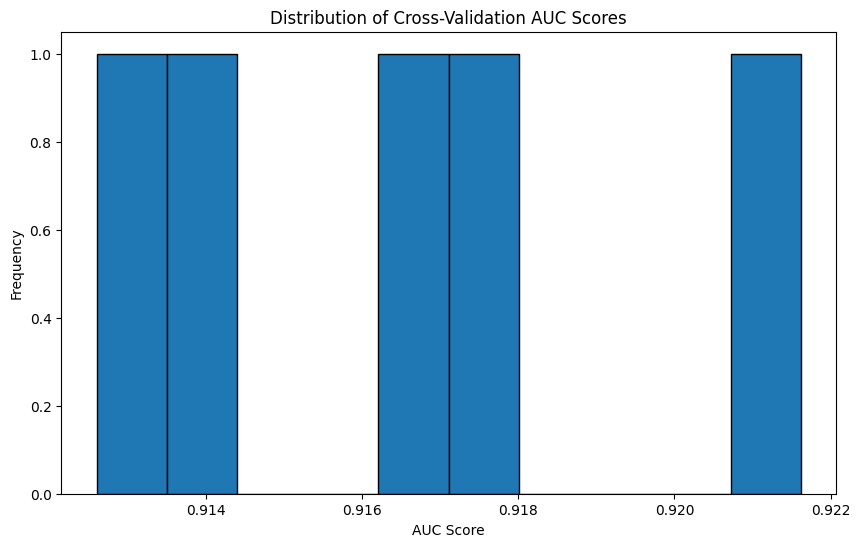

In [33]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import VotingClassifier

def cross_validate_specialized_ensemble(datasets, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = []

    # Combine all training data
    X_train_combined = np.hstack([
        datasets['mi_top']['X_train'],
        datasets['uncorrelated']['X_train'],
        datasets['pca']['X_train'],
        datasets['combined']['X_train']
    ])
    y_train = datasets['mi_top']['y_train'].values.ravel()

    for fold, (train_index, val_index) in enumerate(kf.split(X_train_combined), 1):
        # Split the data
        X_train_fold, X_val_fold = X_train_combined[train_index], X_train_combined[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Create and train specialized models
        rf_mi_top = RandomForestClassifier(n_estimators=100, random_state=42)
        gb_uncorrelated = GradientBoostingClassifier(n_estimators=100, random_state=42)
        lr_pca = LogisticRegression(random_state=42)
        xgb_combined = xgb.XGBClassifier(n_estimators=100, random_state=42)

        rf_mi_top.fit(X_train_fold[:, :30], y_train_fold)
        gb_uncorrelated.fit(X_train_fold[:, 30:52], y_train_fold)
        lr_pca.fit(X_train_fold[:, 52:68], y_train_fold)
        xgb_combined.fit(X_train_fold[:, 68:], y_train_fold)

        # Create and fit ensemble
        ensemble = VotingClassifier(
            estimators=[
                ('rf_mi_top', rf_mi_top),
                ('gb_uncorrelated', gb_uncorrelated),
                ('lr_pca', lr_pca),
                ('xgb_combined', xgb_combined)
            ],
            voting='soft'
        )
        ensemble.fit(X_train_fold, y_train_fold)

        # Predict on validation set
        y_val_pred = ensemble.predict_proba(X_val_fold)[:, 1]

        # Calculate AUC score
        auc_score = roc_auc_score(y_val_fold, y_val_pred)
        cv_scores.append(auc_score)

        print(f"Fold {fold} AUC: {auc_score:.4f}")

    mean_auc = np.mean(cv_scores)
    std_auc = np.std(cv_scores)

    print(f"\nCross-validation results:")
    print(f"Mean AUC: {mean_auc:.4f} (+/- {std_auc * 2:.4f})")

    return cv_scores

# Usage
cv_scores = cross_validate_specialized_ensemble(datasets)

# Plotting the distribution of CV scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(cv_scores, bins=10, edgecolor='black')
plt.title('Distribution of Cross-Validation AUC Scores')
plt.xlabel('AUC Score')
plt.ylabel('Frequency')
plt.show()

- Significant Discrepancy:
There's a large difference between the cross-validation mean AUC (0.9165) and the original ensemble AUC score (0.9999). This discrepancy is the most crucial observation.
- Overfitting Confirmed:
The much lower cross-validation scores strongly suggest that the original high score of 0.9999 was a result of overfitting. The model performed exceptionally well on the specific test set but doesn't generalize as well to other data subsets.

## 3. Stacked Model with Meta-learner:

Fold 1 AUC: 0.9204
Fold 2 AUC: 0.9209
Fold 3 AUC: 0.9228
Fold 4 AUC: 0.9208
Fold 5 AUC: 0.9151

Cross-validation results:
Mean AUC: 0.9200 (+/- 0.0052)


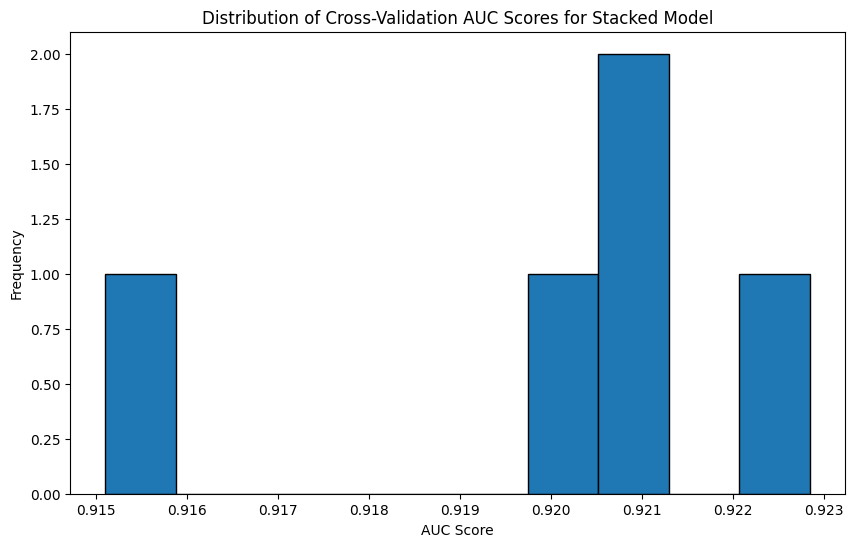

In [34]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

def cross_validate_stacked_model(datasets, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = []

    # Prepare the combined dataset
    X_combined = {}
    for name in datasets.keys():
        X_combined[name] = datasets[name]['X_train']
    y = datasets['mi_top']['y_train'].values.ravel()

    for fold, (train_index, val_index) in enumerate(kf.split(X_combined['mi_top']), 1):
        # Base models
        base_models = {
            'mi_top': RandomForestClassifier(n_estimators=100, random_state=42),
            'uncorrelated': GradientBoostingClassifier(n_estimators=100, random_state=42),
            'pca': LogisticRegression(random_state=42),
            'combined': xgb.XGBClassifier(n_estimators=100, random_state=42)
        }

        # Generate meta-features
        meta_features_train = {}
        meta_features_val = {}
        for name, model in base_models.items():
            X_train_fold = X_combined[name].iloc[train_index]
            X_val_fold = X_combined[name].iloc[val_index]
            y_train_fold = y[train_index]

            model.fit(X_train_fold, y_train_fold)
            meta_features_train[name] = model.predict_proba(X_train_fold)[:, 1]
            meta_features_val[name] = model.predict_proba(X_val_fold)[:, 1]

        # Prepare meta-features for training and validation
        meta_train = np.column_stack(list(meta_features_train.values()))
        meta_val = np.column_stack(list(meta_features_val.values()))

        # Train meta-learner
        meta_learner = LogisticRegression(random_state=42)
        meta_learner.fit(meta_train, y_train_fold)

        # Make predictions on validation set
        y_val_pred = meta_learner.predict_proba(meta_val)[:, 1]

        # Calculate AUC score
        auc_score = roc_auc_score(y[val_index], y_val_pred)
        cv_scores.append(auc_score)

        print(f"Fold {fold} AUC: {auc_score:.4f}")

    mean_auc = np.mean(cv_scores)
    std_auc = np.std(cv_scores)

    print(f"\nCross-validation results:")
    print(f"Mean AUC: {mean_auc:.4f} (+/- {std_auc * 2:.4f})")

    return cv_scores

# Usage
cv_scores = cross_validate_stacked_model(datasets)

# Plotting the distribution of CV scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(cv_scores, bins=10, edgecolor='black')
plt.title('Distribution of Cross-Validation AUC Scores for Stacked Model')
plt.xlabel('AUC Score')
plt.ylabel('Frequency')
plt.show()

1. Model Performance:
The cross-validation mean AUC of 0.9200 indicates excellent performance. An AUC score above 0.9 is generally considered very good for most classification tasks.
2. Consistency:
The small standard deviation (0.0026) and narrow range of AUC scores (0.9151 to 0.9228) across folds suggest that the model's performance is highly consistent across different subsets of the data. This consistency is a positive indicator of the model's stability.
3. Slight Overestimation in Original Score:
The original AUC score (0.9329) is higher than the mean cross-validation score (0.9200), but the difference is not dramatic. This suggests a slight overestimation of the model's performance in the original evaluation, but not severe overfitting.
4. Generalization:
The cross-validation results indicate that the model generalizes well to unseen data. The difference between the lowest (0.9151) and highest (0.9228) fold scores is small, further supporting good generalization.
5. Realistic Performance Estimate:
The mean AUC from cross-validation (0.9200) is likely a more reliable estimate of the model's true performance than the single original score
6. Comparison to Previous Model:
This stacked model shows slightly better and more consistent performance compared to the specialized ensemble model

**Conclusion**

1. Reliable Model:
The stacked model demonstrates high and consistent performance across different data subsets, indicating a reliable and robust model.
2. Slight Overfitting Addressed:
Cross-validation has helped identify and quantify a small degree of overfitting present in the original evaluation. The model's actual performance is excellent, albeit slightly lower than initially estimated.
3. Preferred Model:
Given its higher mean AUC and consistency, this stacked model appears to be preferable to the previously tested specialized ensemble model.
4. Production Readiness:
With an AUC consistently above 0.91, this model could be considered ready for production use in many credit risk modeling scenarios, subject to business requirements and regulatory considerations.

# Risk Strategy

In [41]:
def create_strategy_table(base_models, meta_learner, datasets):
    # Use the stacked model to get probabilities
    meta_test = np.column_stack([
        model.predict_proba(datasets[name]['X_test'])[:, 1]
        if model.predict_proba(datasets[name]['X_test']).shape[1] > 1
        else model.predict_proba(datasets[name]['X_test'])
        for name, model in base_models.items()
    ])
    prob_default = meta_learner.predict_proba(meta_test)[:, 1]

    # Ensure we're using consistent y_test across all datasets
    y_test = datasets['mi_top']['y_test'].values.ravel()
    for name, data in datasets.items():
        if not np.array_equal(y_test, data['y_test'].values.ravel()):
            raise ValueError(f"Inconsistent y_test found in dataset: {name}")

    # Assuming loan_amnt is available in all datasets, let's use 'mi_top' for simplicity
    # In a real scenario, you might want to ensure this is consistent across datasets or combine them
    loan_amounts = datasets['mi_top']['X_test']['loan_amnt'].values

    accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55,
                    0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

    results = []
    for rate in accept_rates:
        threshold = np.quantile(prob_default, rate)
        pred_status = (prob_default <= threshold).astype(int)
        accepted_loans = pred_status == 0

        bad_rate = np.sum(y_test[accepted_loans]) / np.sum(accepted_loans)
        num_accepted = np.sum(accepted_loans)
        avg_loan_amount = np.mean(loan_amounts[accepted_loans])

        portfolio_value = avg_loan_amount * num_accepted * (1 - bad_rate)
        expected_loss = np.sum(prob_default[accepted_loans] * loan_amounts[accepted_loans])

        results.append({
            'Acceptance Rate': rate,
            'Threshold': threshold,
            'Bad Rate': bad_rate,
            'Accepted Loans': num_accepted,
            'Avg Loan Amount': avg_loan_amount,
            'Portfolio Value': portfolio_value,
            'Expected Loss': expected_loss
        })

    return pd.DataFrame(results)

# Usage
strategy_table = create_strategy_table(base_models, meta_learner, datasets)
strategy_table

<ipython-input-41-5d7512e7316f>:30: RuntimeWarning: invalid value encountered in scalar divide
  bad_rate = np.sum(y_test[accepted_loans]) / np.sum(accepted_loans)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,Acceptance Rate,Threshold,Bad Rate,Accepted Loans,Avg Loan Amount,Portfolio Value,Expected Loss
0,1.00,0.988225,NaN,0,NaN,NaN,0.000000e+00
1,0.95,0.983527,1.000000,326,10055.444785,0.000000e+00,3.228756e+06
2,0.90,0.972767,1.000000,652,11443.098160,0.000000e+00,7.329918e+06
3,0.85,0.673870,0.935583,978,11402.044990,7.183288e+05,1.050236e+07
4,0.80,0.332467,0.811972,1303,11100.249424,2.719561e+06,1.206906e+07
5,0.75,0.170554,0.716390,1629,10872.007366,5.022867e+06,1.284916e+07
6,0.70,0.109651,0.625064,1955,10547.020460,7.730966e+06,1.324783e+07
7,0.65,0.082706,0.554825,2280,10186.732456,1.033953e+07,1.349591e+07
8,0.60,0.069825,0.496163,2606,9965.032617,1.308409e+07,1.370354e+07
9,0.55,0.061005,0.450546,2932,9801.722374,1.579057e+07,1.388365e+07
